In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
print(lats)
print(lngs)

[ 21.97817935 -21.22014398  16.79176494 ... -25.1657403  -38.95791397
  26.86017158]
[  4.83222202  80.36743834 139.11258645 ...  49.37362672  38.78759309
  22.39311969]


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
import os.path
output_data_file = "weather_data/cities.csv"
file_exists =os.path.isfile(output_data_file)

In [10]:
if not file_exists:
    print('call api')

In [11]:
if not file_exists:
    # Create an empty list to hold the weather data.
    city_data = []
    # Print the beginning of the logging.
    print("Beginning Data Retrieval     ")
    print("-----------------------------")

    # Create counters.
    record_count = 1
    set_count = 1
    # Loop through all the cities in the list.
    for i, city in enumerate(cities):

        # Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
        # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

        # Log the URL, record, and set numbers and the city.
        #print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1
        # Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                                "Lat": city_lat,
                                "Lng": city_lng,
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date})

        # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

        # Indicate that Data Loading is complete.
        print("-----------------------------")
        print("Data Retrieval Complete      ")
        print("-----------------------------")

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
if not file_exists:
    city_data_df = pd.DataFrame(city_data)
    city_data_df.head(10)

In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
 

In [14]:
if not file_exists:
    city_data_df = city_data_df[new_column_order]
    city_data_df.head(10)

In [15]:
if not file_exists:
    # Create the output file (CSV).
    output_data_file = "weather_data/cities.csv"
    # Export the City_Data into a CSV.
    city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
if file_exists:
    output_data_file = "weather_data/cities.csv"
    city_data_df = pd.read_csv(output_data_file) 
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hobart,AU,2020-09-02 14:12:33,-42.88,147.33,54.00,66,20,10.29
1,1,Prainha,BR,2020-09-02 14:15:04,-1.80,-53.48,89.83,50,0,6.06
2,2,Severo-Kurilsk,RU,2020-09-02 14:15:05,50.68,156.12,53.40,79,100,8.16
3,3,Kodiak,US,2020-09-02 14:15:05,57.79,-152.41,51.80,81,90,1.61
4,4,Punta Arenas,CL,2020-09-02 14:15:05,-53.15,-70.92,37.00,72,90,5.82
...,...,...,...,...,...,...,...,...,...,...
551,551,San Luis,AR,2020-09-02 14:17:49,-33.30,-66.34,51.44,45,0,4.47
552,552,Betioky,MG,2020-09-02 14:17:50,-23.72,44.38,70.20,52,6,15.50
553,553,Ibague,CO,2020-09-02 14:13:56,4.44,-75.23,73.09,55,99,3.71
554,554,Kilembe,UG,2020-09-02 14:17:50,0.20,30.00,74.66,47,55,2.82


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

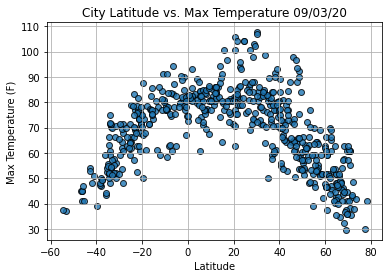

In [18]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


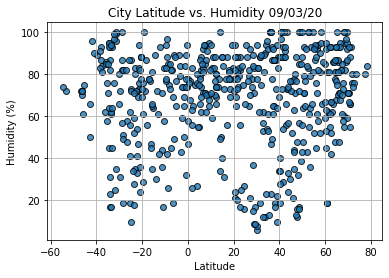

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

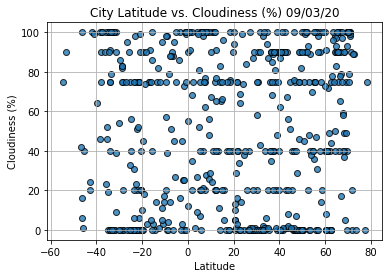

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

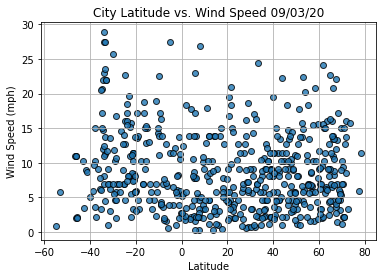

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [44]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                  New Norfolk
Country                        AU
Date          2020-09-02 14:15:09
Lat                        -42.78
Lng                        147.06
Max Temp                    53.01
Humidity                       50
Cloudiness                     24
Wind Speed                   3.53
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
551    False
552    False
553     True
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hobart,AU,2020-09-02 14:12:33,-42.88,147.33,54.00,66,20,10.29
1,1,Prainha,BR,2020-09-02 14:15:04,-1.80,-53.48,89.83,50,0,6.06
2,2,Severo-Kurilsk,RU,2020-09-02 14:15:05,50.68,156.12,53.40,79,100,8.16
3,3,Kodiak,US,2020-09-02 14:15:05,57.79,-152.41,51.80,81,90,1.61
4,4,Punta Arenas,CL,2020-09-02 14:15:05,-53.15,-70.92,37.00,72,90,5.82


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

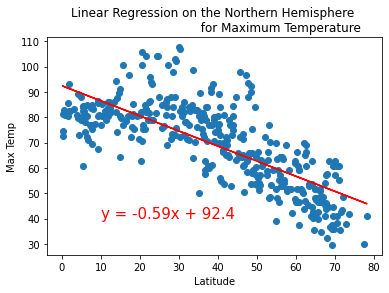

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_title = 'Linear Regression on the Northern Hemisphere \n                                  for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, plot_title, 'Max Temp',(10,40))

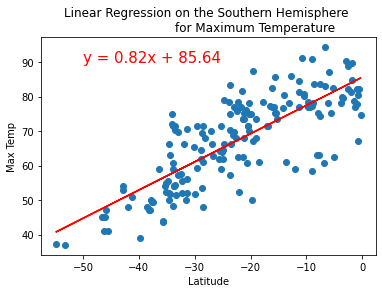

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

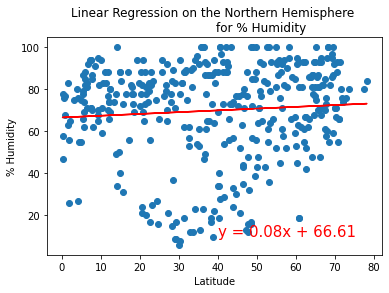

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

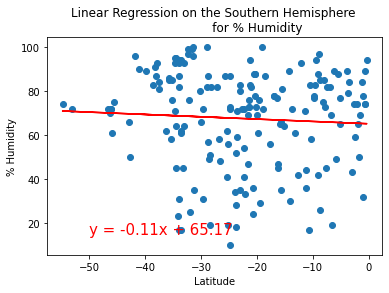

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                      for % Humidity', '% Humidity',(-50,15))

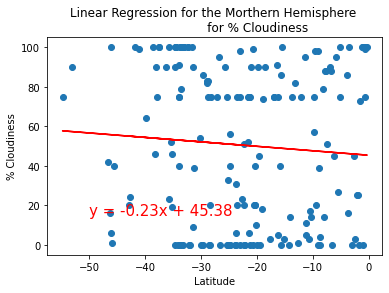

In [32]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression for the Morthern Hemisphere \n                      for % Cloudiness', '% Cloudiness',(-50,15))

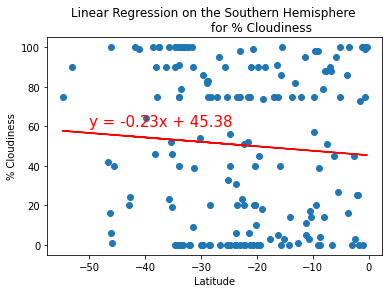

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

y = 0.03x + 6.69
(40, 20)


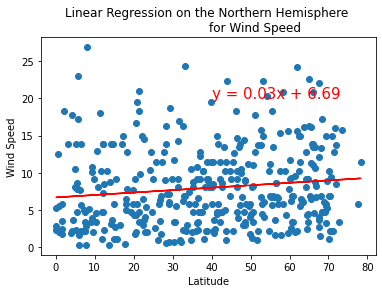

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,20))

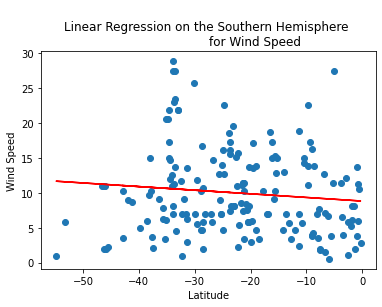

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,35))